In [2]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

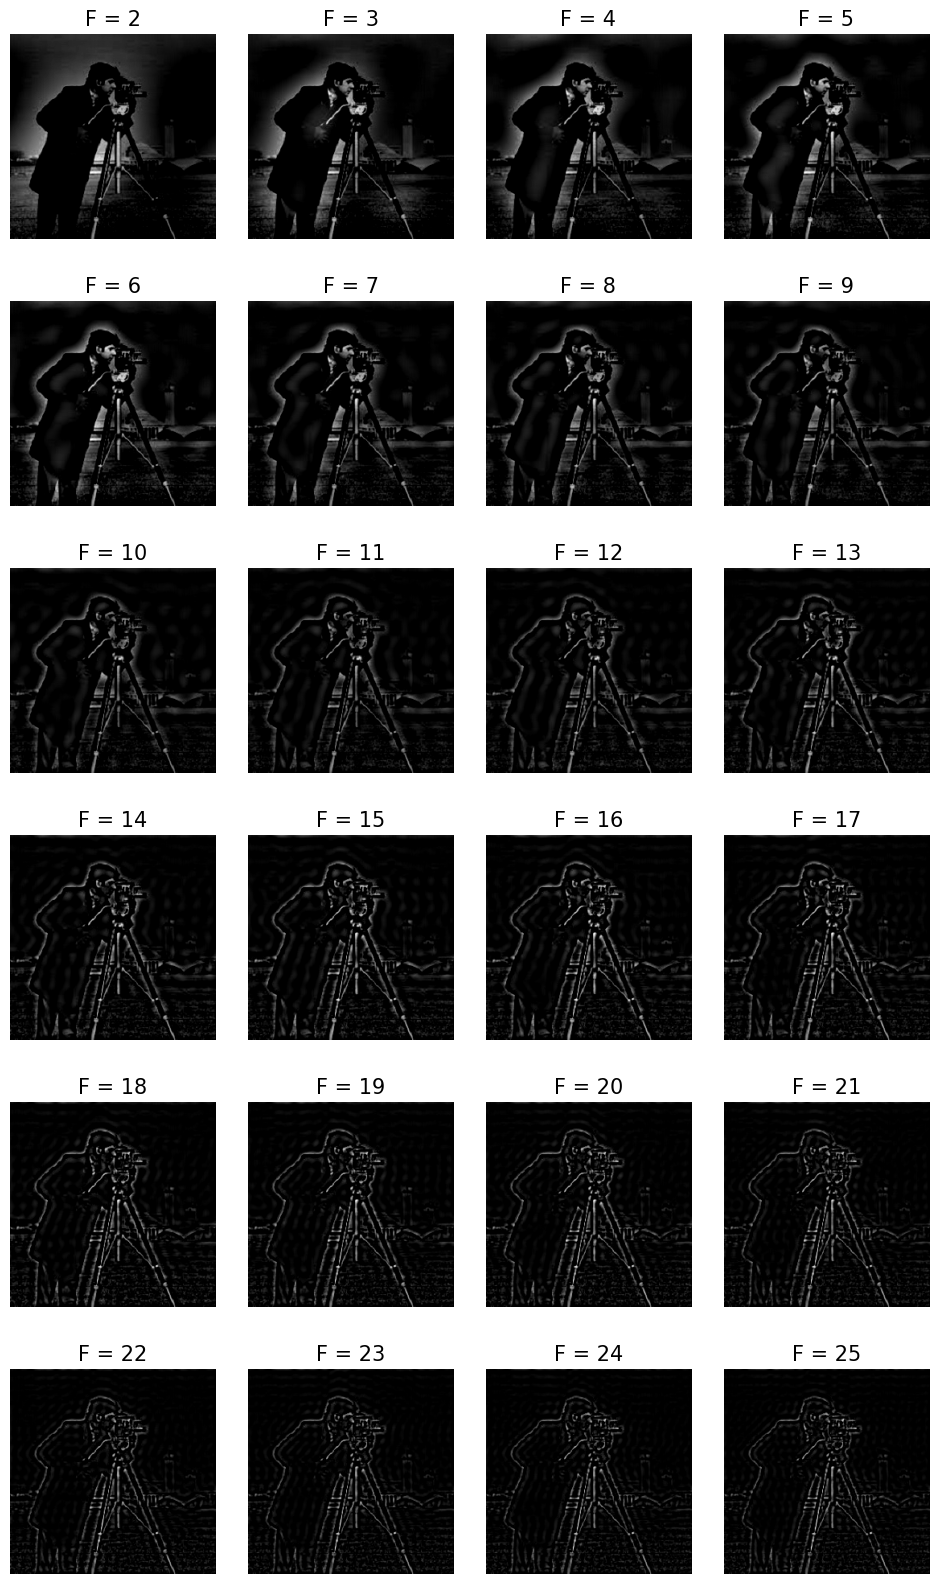

In [ ]:
import numpy as np
from PIL import Image
from scipy import fftpack
import matplotlib.pyplot as plt

def calculate_snr(image):
    """Tính Signal-to-Noise Ratio (SNR)"""
    mean_signal = np.mean(image)
    std_noise = np.std(image)
    return mean_signal / std_noise if std_noise != 0 else 0
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fftpack.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w / 2), int(h / 2)
snrs_hp = []
lbs = list(range(1, 25))
plt.figure(figsize=(12, 20))
for l in lbs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2[half_w - l:half_w + l + 1, half_h - l:half_h + l + 1] = 0
    im1 = np.clip(fftpack.ifft2(fftpack.ifftshift(freq2)).real, 0, 255)
    snrs_hp.append(calculate_snr(im1))
    plt.subplot(6, 4, l)
    plt.imshow(im1, cmap='gray')
    plt.axis('off')
    plt.title('F = ' + str(l + 1), size=15)
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy.fft import fft2, ifft2
from scipy.ndimage import fourier_uniform, fourier_ellipsoid

# Đọc ảnh màu
im = imread('../images/lena.jpg')

# Chuyển ảnh sang ảnh xám (grayscale) nếu ảnh màu
if len(im.shape) == 3:
    im = np.mean(im, axis=2)  # Tính trung bình của các kênh màu (RGB -> Grayscale)

# Chuyển ảnh sang miền tần số
im_fft = fft2(im)

# Tạo bộ lọc Fourier (hộp)
lpf_box = fourier_uniform(im.shape, size=30)  # Kích thước của bộ lọc hộp

# Tạo bộ lọc Fourier (elip)
lpf_ellipsoid = fourier_ellipsoid(im.shape, size=30)  # Kích thước của bộ lọc elip

# Áp dụng bộ lọc hộp trong miền tần số
im_fft_box = im_fft * lpf_box

# Áp dụng bộ lọc elip trong miền tần số
im_fft_ellipsoid = im_fft * lpf_ellipsoid

# Chuyển ảnh trở lại miền không gian
im_box = np.abs(ifft2(im_fft_box))
im_ellipsoid = np.abs(ifft2(im_fft_ellipsoid))

# Hiển thị ảnh gốc và các ảnh đã áp dụng bộ lọc LPF
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(im_box, cmap='gray')
plt.title('LPF with Box Kernel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(im_ellipsoid, cmap='gray')
plt.title('LPF with Ellipsoid Kernel')
plt.axis('off')

plt.tight_layout()
plt.show()


ValueError: operands could not be broadcast together with shapes (220,220) (2,) 